In [3]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import os
import re

%matplotlib inline

resultsDir='/data/eolson/MEOPAR/SS2DSOGruns/'
N2chl=1.600
r=nc.Dataset('/data/eolson/MEOPAR/SS2DSOGruns/nuts_SOG1100x10_S3-2014-10-19-WithMRubraMicroZooRemin.nc')

In [4]:
print(r)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format UNDEFINED):
    title: SS2DSOG NO, Si, NH4, PHY, PHY2, MYRI, Z, DOC, POC, bSi initialization
    institution: 
Dept of Earth, Ocean & Atmospheric Sciences, University of British Columbia
    comment: 
Based on SG-S3-2004-10-19.sog and nuts-S3-2004-10-19.sog
    reference: 
eolson: createIC_NutsPhy_SS2DSOG5x5_S3-2004-10-19-WithMRubraMicrozooRemin-2d.ipynb
    dimensions(sizes): y(10), x(1100), deptht(101), time_counter(1)
    variables(dimensions): float64 time_counter(time_counter), float64 deptht(deptht), float64 x(y,x), float64 y(y,x), float64 NO3(time_counter,deptht,y,x), float64 Si(time_counter,deptht,y,x), float64 NH4(time_counter,deptht,y,x), float64 PHY(time_counter,deptht,y,x), float64 PHY2(time_counter,deptht,y,x), float64 MYRI(time_counter,deptht,y,x), float64 MICZ(time_counter,deptht,y,x), float64 POC(time_counter,deptht,y,x), float64 DOC(time_counter,deptht,y,x), float64 bSi(time_counter,deptht,y

In [9]:
print(r.variables['deptht'][:])

[   0.5    1.5    2.5    3.5    4.5    5.5    6.5    7.5    8.5    9.5
   10.5   11.5   12.5   13.5   14.5   15.5   16.5   17.5   18.5   19.5
   20.5   21.5   22.5   23.5   24.5   25.5   26.5   27.5   28.5   29.5
   30.5   31.5   32.5   33.5   34.5   35.5   36.5   37.5   38.5   39.5
   40.5   41.5   42.5   43.5   44.5   45.5   46.5   47.5   48.5   49.5
   50.5   51.5   52.5   53.5   54.5   55.5   56.5   57.5   58.5   59.5
   60.5   61.5   62.5   63.5   64.5   65.5   66.5   67.5   68.5   69.5
   70.5   71.5   72.5   73.5   74.5   75.5   76.5   77.5   78.5   79.5
   80.5   81.5   82.5   83.5   84.5   85.5   86.5   87.5   88.5   89.5
   90.5   91.5   92.5   93.5   94.5   95.5   96.5   97.5   98.5   99.5
  100.5]


In [14]:
temp=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/bathy_meter.nc')

In [12]:
print(temp.variables)

OrderedDict([('x', <class 'netCDF4._netCDF4.Variable'>
float64 x(y, x)
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('y', <class 'netCDF4._netCDF4.Variable'>
float64 y(y, x)
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
), ('Bathymetry', <class 'netCDF4._netCDF4.Variable'>
float64 Bathymetry(y, x)
    least_significant_digit: 1
    units: metres
unlimited dimensions: 
current shape = (10, 1100)
filling on, default _FillValue of 9.969209968386869e+36 used
)])


In [15]:
temp2=nc.Dataset('/data/eolson/MEOPAR/SS36runs/runSOG2d_exp/bathy_meter2.nc','w')

In [21]:
B=np.copy(temp.variables['Bathymetry'])

In [30]:

X=temp.variables['x']
Y=temp.variables['y']

In [19]:
temp2.createDimension('y', B.shape[0])
temp2.createDimension('x',B.shape[1])

<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1100

In [22]:
B[B>300]=300.

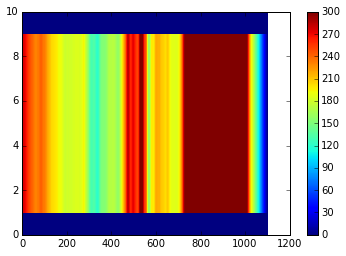

In [27]:
plt.pcolormesh(B[:]); plt.colorbar()

In [25]:
print(B[0,1:5])
print(B[1,1:5])
print(B[1:5,0])
print(B[1:5,1])

[-0. -0. -0. -0.]
[-0. -0. -0. -0.]
[-0. -0. -0. -0.]
[-0. -0. -0. -0.]


In [26]:
B[1,:]=B[2,:]
B[8,:]=B[7,:]

In [28]:
B[0,:]=B[2,:]
B[9,:]=B[7,:]

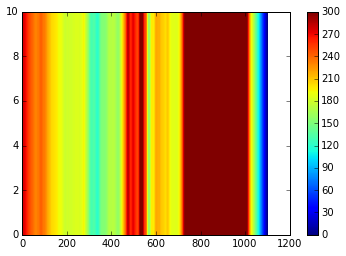

In [29]:
plt.pcolormesh(B[:]); plt.colorbar()

In [31]:
new_x=temp2.createVariable('x',float,('y','x'), zlib=True)
new_x.setncattr('units','metres')
new_y = temp2.createVariable('y',float,('y','x'), zlib=True)
new_y.setncattr('units','metres')
newdepths = temp2.createVariable(
    'Bathymetry', float, ('y','x'),
    zlib = True, least_significant_digit=1)
newdepths.setncattr('units','metres')

In [32]:
new_x[:]=X;
new_y[:]=Y;
newdepths[:]=B

In [34]:
temp2.close()

In [35]:
temp.close()